In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
from scipy.signal import find_peaks

In [2]:
def calc(filename, test, plot=True):
    df = pd.read_excel(filename, nrows=1400)
    df = df[101:].reset_index()
    df['Time'] = df.Time.apply(lambda x: x*1000)
    max_ind_r, _ = find_peaks(df.right)
    min_ind_r, _ = find_peaks(-df.right)
    max_ind_l, _ = find_peaks(df.left)
    min_ind_l, _ = find_peaks(-df.left)
    max_val_r = df.iloc[max_ind_r].reset_index()
    min_val_r = df.iloc[min_ind_r].reset_index()
    max_val_l = df.iloc[max_ind_l].reset_index()
    min_val_l = df.iloc[min_ind_l].reset_index()
    if plot:
        fig, ax = plt.subplots(figsize=(14, 8))
        sns.set_style('darkgrid')
        plt.plot(df.Time, df.right, label='Right')
        plt.plot(max_val_r.Time, max_val_r.right, 'x')
        plt.plot(min_val_r.Time, min_val_r.right, 'x')
        plt.plot(df.Time, df.left, label='Left')
        plt.plot(max_val_l.Time, max_val_l.left, 'x')
        plt.plot(min_val_l.Time, min_val_l.left, 'x')
        plt.xlabel('Time [msec]')
        plt.ylabel('Strain [mV]')
        plt.legend(loc="right")
        plt.savefig('data/{}.png'.format(test))
        plt.show()
    plt.close('all')
    dic = {}
    amp_r = max_val_r.right - min_val_r.right
    dic['amp_r'] = amp_r
    mean_r = np.mean(amp_r)
    dic['mean_r'] = mean_r
    standard_div_r = np.std(amp_r)
    dic['standard_div_r'] = standard_div_r
    amp_l = max_val_l.left - min_val_l.left
    mean_l = np.mean(amp_l)
    dic['mean_l'] = mean_l
    standard_div_l = np.std(amp_l)
    dic['standard_div_l'] = standard_div_l
    T_right = [max_val_r.Time[i+1] - max_val_r.Time[i] for i in range(len(max_val_r)-1)]
    T_left = [max_val_l.Time[i+1] - max_val_l.Time[i] for i in range(len(max_val_l)-1)]
    T_right_mean = np.mean(T_right)
    T_left_mean = np.mean(T_left)
    T_right_std = np.std(T_right)
    T_left_std = np.std(T_left)
    dic.update({'T_right_mean':T_right_mean, 'T_left_mean':T_left_mean, 'T_right_std':T_right_std, 'T_left_std':T_left_std})
    time_diff = max_val_l.Time - max_val_r.Time
    time_diff.dropna(inplace=True)
    time_diff_mean = np.mean(time_diff)
    time_diff_std = np.std(time_diff)
    freq = 1/(time_diff_mean/1000)
    phase_diff = (time_diff_mean)*360/T_right_mean
    dic.update({'time_diff_mean':time_diff_mean, 'time_diff_std':time_diff_std, 'freq':freq, 'phase_diff':phase_diff})
    return dic

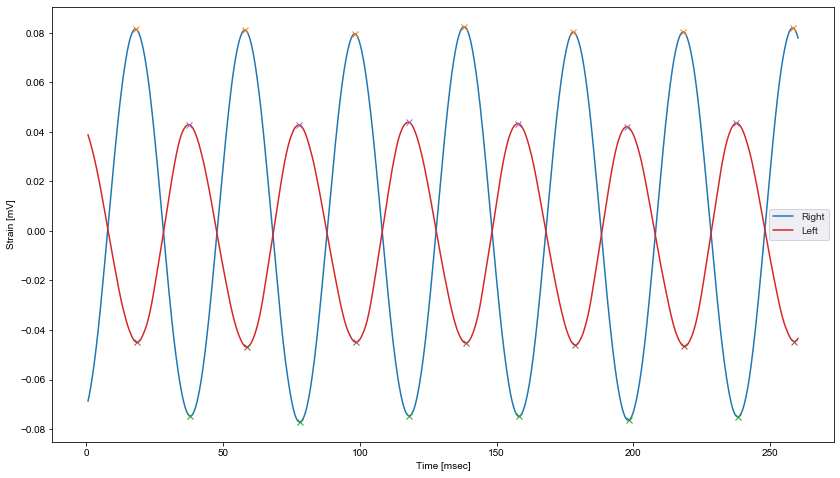

In [3]:
dic_first = calc('data/first_1.xlsx', test='first')

In [4]:
from IPython.display import Markdown as md

md('Noise size: 0.003 mV ')

Noise size: 0.003 mV 

In [5]:
md(f"Right Wheel period mean: {dic_first['T_right_mean']:.2f} msec <br>"
   f" Right Wheel period std: {dic_first['T_right_std']:.2f} msec <br>"
   f"Left Wheel period mean: {dic_first['T_left_mean']:.2f} msec <br>"
   f"Left Wheel period std: {dic_first['T_left_std']:.2f} msec")

Right Wheel period mean: 40.03 msec <br> Right Wheel period std: 0.14 msec <br>Left Wheel period mean: 40.04 msec <br>Left Wheel period std: 0.20 msec

In [6]:
md(f"Right Wheel Amplitude mean: {dic_first['mean_r']:.3f} mV <br>"
   f" Right Wheel Amplitude std: {dic_first['standard_div_r']:.3f} mV <br>"
   f"Left Wheel Amplitude mean: {dic_first['mean_l']:.3f} mV <br>"
   f"Left Wheel Amplitude std: {dic_first['standard_div_l']:.3f} mV")

Right Wheel Amplitude mean: 0.156 mV <br> Right Wheel Amplitude std: 0.001 mV <br>Left Wheel Amplitude mean: 0.089 mV <br>Left Wheel Amplitude std: 0.001 mV

In [7]:
md(f"Time difference mean: {dic_first['time_diff_mean']:.3f} msec <br>"
   f" Time difference std: {dic_first['time_diff_std']:.3f} msec <br>"
   f"Frequancy: {dic_first['freq']:.3f} Hz <br>"
   f" ∆$\phi$ = {dic_first['phase_diff']:.2f}&deg; ")

Time difference mean: 19.600 msec <br> Time difference std: 0.163 msec <br>Frequancy: 51.020 Hz <br> ∆$\phi$ = 176.25&deg; 

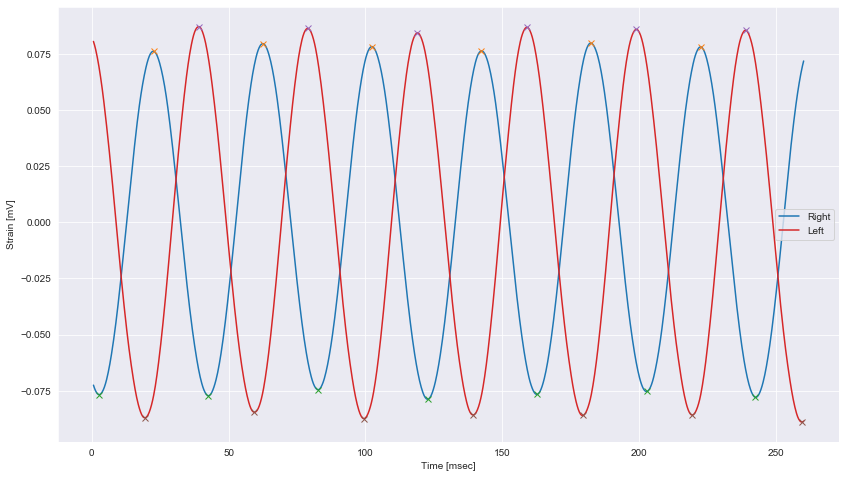

In [8]:
dic_second = calc('data/second_1.xlsx', 'second')

In [9]:
md(f"Right Wheel period mean: {dic_second['T_right_mean']:.2f} msec <br>"
   f" Right Wheel period std: {dic_second['T_right_std']:.2f} msec <br>"
   f"Left Wheel period mean: {dic_second['T_left_mean']:.2f} msec <br>"
   f"Left Wheel period std: {dic_second['T_left_std']:.2f} msec")

Right Wheel period mean: 40.00 msec <br> Right Wheel period std: 0.13 msec <br>Left Wheel period mean: 40.00 msec <br>Left Wheel period std: 0.00 msec

In [10]:
md(f"Right Wheel Amplitude mean: {dic_second['mean_r']:.3f} mV <br>"
   f" Right Wheel Amplitude std: {dic_second['standard_div_r']:.3f} mV <br>"
   f"Left Wheel Amplitude mean: {dic_second['mean_l']:.3f} mV <br>"
   f"Left Wheel Amplitude std: {dic_second['standard_div_l']:.3f} mV")


Right Wheel Amplitude mean: 0.155 mV <br> Right Wheel Amplitude std: 0.002 mV <br>Left Wheel Amplitude mean: 0.172 mV <br>Left Wheel Amplitude std: 0.001 mV

In [11]:
md(f"Time difference mean: {dic_second['time_diff_mean']:.3f} msec <br>"
   f" Time difference std: {dic_second['time_diff_std']:.3f} msec <br>"
   f"Frequancy: {dic_second['freq']:.3f} Hz <br>"
   f" ∆$\phi$ = {dic_second['phase_diff']:.2f}&deg; ")

Time difference mean: 16.500 msec <br> Time difference std: 0.100 msec <br>Frequancy: 60.606 Hz <br> ∆$\phi$ = 148.50&deg; 

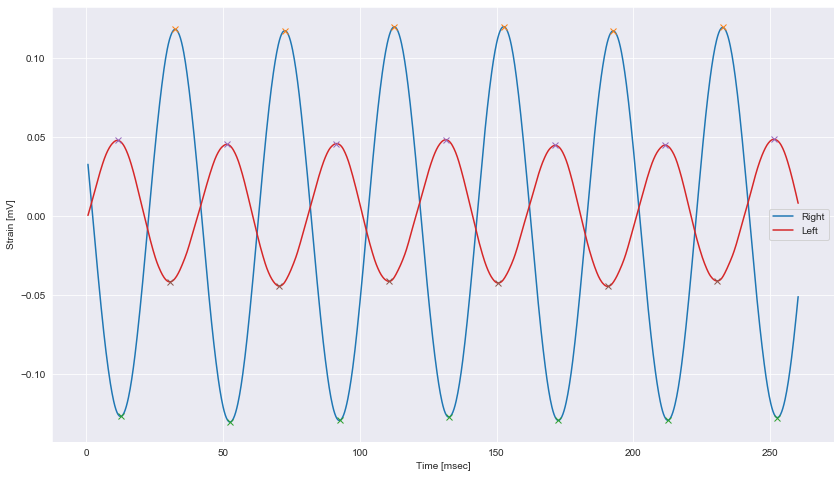

In [12]:
dic_third = calc('data/third_1.xlsx', 'third')

In [13]:
md(f"Right Wheel period mean: {dic_third['T_right_mean']:.2f} msec <br>"
   f" Right Wheel period std: {dic_third['T_right_std']:.2f} msec <br>"
   f"Left Wheel period mean: {dic_third['T_left_mean']:.2f} msec <br>"
   f"Left Wheel period std: {dic_third['T_left_std']:.2f} msec")

Right Wheel period mean: 40.04 msec <br> Right Wheel period std: 0.08 msec <br>Left Wheel period mean: 40.00 msec <br>Left Wheel period std: 0.12 msec

In [14]:
md(f"Right Wheel Amplitude mean: {dic_third['mean_r']:.3f} mV <br>"
   f" Right Wheel Amplitude std: {dic_third['standard_div_r']:.3f} mV <br>"
   f"Left Wheel Amplitude mean: {dic_third['mean_l']:.3f} mV <br>"
   f"Left Wheel Amplitude std: {dic_third['standard_div_l']:.3f} mV")


Right Wheel Amplitude mean: 0.247 mV <br> Right Wheel Amplitude std: 0.001 mV <br>Left Wheel Amplitude mean: 0.089 mV <br>Left Wheel Amplitude std: 0.002 mV

In [15]:
md(f"Time difference mean: {abs(dic_third['time_diff_mean']):.3f} msec <br>"
   f" Time difference std: {abs(dic_third['time_diff_std']):.3f} msec <br>"
   f"Frequancy: {abs(dic_third['freq']):.3f} Hz <br>"
   f" ∆$\phi$ = {abs(dic_third['phase_diff'])-180:.2f}&deg; ")

Time difference mean: 21.133 msec <br> Time difference std: 0.094 msec <br>Frequancy: 47.319 Hz <br> ∆$\phi$ = 10.01&deg; 

In [16]:
import cmath

v10 = dic_first['mean_l'] * np.exp(1j * (np.pi*dic_first['phase_diff']/180))
v20 = dic_first['mean_r'] * np.exp(1j * (np.pi*0/180))
v = np.array([[v10, v20]])

In [17]:
v11 = dic_second['mean_l'] * np.exp(1j * (np.pi*dic_second['phase_diff']/180))
v21 = dic_second['mean_r'] * np.exp(1j * (np.pi*0/180))
# v12 = dic_third['mean_l'] * (np.exp(1j * np.pi*-dic_third['phase_diff']/180))
# v22 = dic_third['mean_r'] * np.exp(1j * (np.pi*0/180))

v12 = dic_third['mean_l'] * (np.exp(1j * np.pi*dic_first['phase_diff']/180))
v22 = dic_third['mean_r'] * np.exp(1j * (np.pi*(abs(dic_third['phase_diff'])-dic_first['phase_diff'])/180))


\begin{equation*}
\vec{\mathbf{V}} = B \vec{U} = \begin{bmatrix}
B_{11} & B_{12} \\
B_{21} & B_{22} 
\end{bmatrix} \vec{U} =
\begin{bmatrix}
\frac{v_{11}-v_{10}}{U_{T_1}} &  \frac{v_{12}-v_{10}}{U_{T_2}}  \\
\frac{v_{21}-v_{20}}{U_{T_1}} &  \frac{v_{22}-v_{20}}{U_{T_2}}
\end{bmatrix} \vec{U}
\end{equation*}

\begin{equation*}
\vec{U_c} = -B^{-1}  \vec{V}
\end{equation*}

In [18]:
theta1, theta2 = 130., 40. 
UT1 = 24.44 * np.exp(1j * (np.pi*theta1/180))
UT2 = 24.44 * np.exp(1j * (np.pi*theta2/180))
B11 = (v11 - v10)/UT1
B12 = (v12 - v10)/UT2
B21 = (v21 - v20)/UT1
B22 = (v22 - v20)/UT2
B = np.array([[B11, B12], [B21, B22]])

In [19]:
# cmath.polar((v11 - v10)/UT1)[1]*180/np.pi

In [20]:
from sympy import simplify

B_inv = np.linalg.inv(B)
Uc = np.dot(-B_inv, v.T)
simplify(Uc)

[[21.3409609948101 + 0.567388865929858*I], [-37.4823158181561 - 3.52455123355153*I]]

In [21]:
cmath.polar(Uc[0])

(21.34850220289907, 0.02658058531157362)

In [22]:
cmath.polar(Uc[1])

(37.64766208531314, -3.047835963473952)

In [23]:
m1 = cmath.polar(Uc[0])[0]
m2 = cmath.polar(Uc[1])[0]
teta1 = cmath.polar(Uc[0])[1]
teta2 = cmath.polar(Uc[1])[1]

In [24]:
print(m1)
print(m2)
print(teta1*180/np.pi)
print(360 + teta2*180/np.pi)

21.34850220289907
37.64766208531314
1.5229553553405968
185.37186264475363


In [25]:
md(f"Correction Mass 1: {m1:.2f} gr <br>"
   f" Correction Mass 2: {m2:.2f} gr <br>"
   f"$ \phi_1 $: {teta1*180/np.pi:.2f} &deg; <br>"
   f"$ \phi_2 $: {360 + teta2*180/np.pi:.2f} &deg; ")

Correction Mass 1: 21.35 gr <br> Correction Mass 2: 37.65 gr <br>$ \phi_1 $: 1.52 &deg; <br>$ \phi_2 $: 185.37 &deg; 

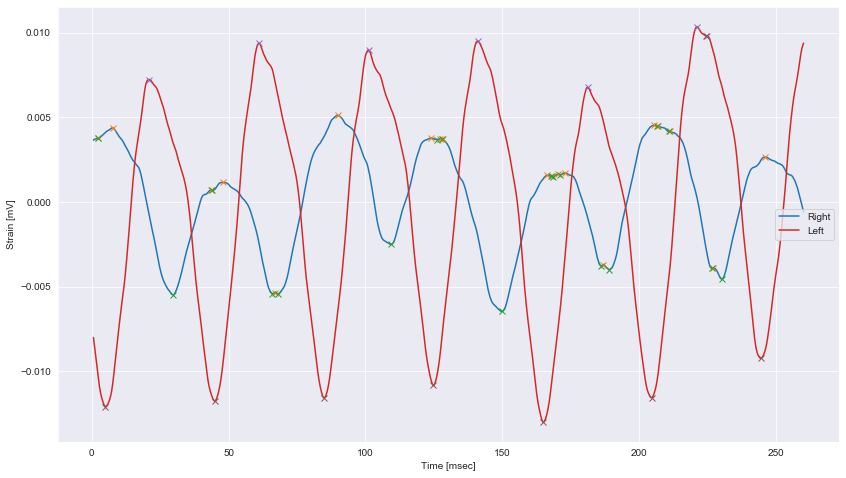

{'amp_r': 0     0.000004
 1     0.009864
 2     0.000005
 3     0.006571
 4     0.000071
 5     0.007615
 6     0.000092
 7     0.000030
 8     0.010158
 9     0.000064
 10    0.000016
 11    0.000017
 12    0.005483
 13    0.000261
 14    0.000033
 15    0.000322
 16    0.008087
 17    0.000641
 18         NaN
 Name: right, dtype: float64,
 'mean_r': 0.0027407777777777777,
 'standard_div_r': 0.003818827009488,
 'mean_l': 0.01757842857142857,
 'standard_div_l': 0.007216691522478444,
 'T_right_mean': 13.544444444444721,
 'T_left_mean': 34.03333333333406,
 'T_right_std': 12.359396884881985,
 'T_left_std': 13.521546591356696,
 'time_diff_mean': 81.31428571428754,
 'time_diff_std': 36.593341649285435,
 'freq': 12.297962052002536,
 'phase_diff': 2161.265674440412}

In [26]:
calc('data/blanced_1.xlsx', 'balanced')